In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

cap = cv2.VideoCapture(0)
window_name='camera'

font = cv2.FONT_HERSHEY_SIMPLEX
fontScale = 0.8
color = (255, 0, 0)
thickness = 2

blueMatrix = cv2.cvtColor(np.uint8([[[0,0,255]]]),cv2.COLOR_BGR2HSV)
lower_blue = np.array([99,0,0])
upper_blue = np.array([125,255,255])

cv2.namedWindow(window_name,cv2.WND_PROP_FULLSCREEN)
cv2.setWindowProperty(window_name,cv2.WND_PROP_FULLSCREEN,cv2.WINDOW_FULLSCREEN)

fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.avi',fourcc, 30.0, (640,480)) # capture 30 frame per second
                                                # video resolution 640x480
while (True):
    ret, frame = cap.read()
    pixelsInFrame = np.size(frame)
    #print(pixelsInFrame)
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv, lower_blue, upper_blue)
    countBlue = cv2.countNonZero(mask) 
    mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)
    countBlue = np.sum(mask)/255
    ratio = (countBlue/pixelsInFrame)

    
    hori = np.concatenate((frame, mask), axis=1) 
    hori = cv2.putText(hori, str(ratio), (20,20), font, fontScale, color, thickness, cv2.LINE_AA)
    cv2.imshow(window_name,hori)
    out.write(hori)
    if cv2.waitKey(1) & 0xFF == ord('q'): # btw, you need to click the screen first. And then 
                                         # press q to quit
        break
        
cap.release()
out.release()
cv2.destroyAllWindows()

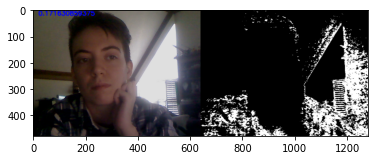

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
rgb = cv2.cvtColor(hori, cv2.COLOR_BGR2RGB)
plt.imshow(rgb)